In [1]:
# PRIMEIRA TENTATIVA DE RESOLUÇÃO, ALCANCEI O SCORE MAXIMO DE 0.75119

# IMPORT DATA MANAGEMENT AND VISUALIZATION LIBS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# FEATURES
# survival -> Survival - 0 = No, 1 = Yes
# pclass   -> Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
# sex      -> Sex
# Age      -> Age in years
# sibsp    -> # of siblings / spouses aboard the Titanic
# parch    -> # of parents / children aboard the Titanic
# ticket   -> Ticket number
# fare     -> Passenger fare
# cabin    -> Cabin number
# embarked -> Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# LOAD TRAIN AND TEST DATASET
df_train = pd.read_csv("../dataset/titanic/train.csv")
df_test = pd.read_csv("../dataset/titanic/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Plots

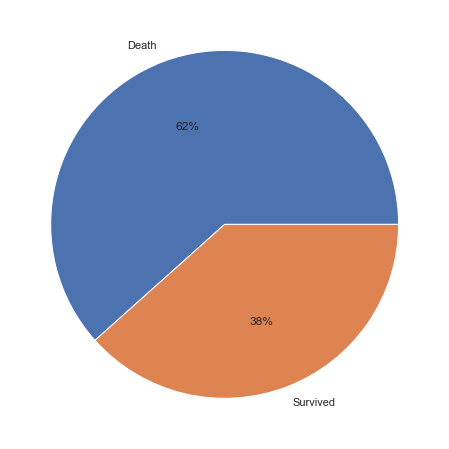

In [10]:
# SEE THE PERCENTAGE OF DEATHS AND SURVIVED PEOPLE
fig = plt.figure(figsize=(10, 8))
plt.pie(df_train["Survived"].value_counts(), labels=["Death", "Survived"] ,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

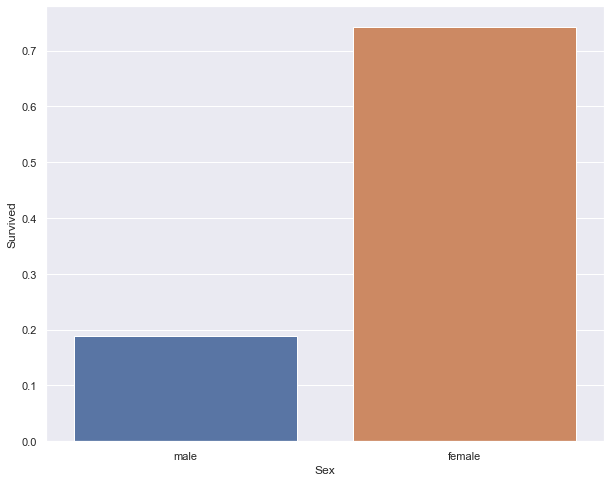

In [11]:
# NOW DIVIDED BY SEX
# FEMALE HAVE TH GREATEST NUMBER OF SURVIVED, AND IS A BIG DIFFERENCE
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_train, y="Survived", x="Sex", ci=False)

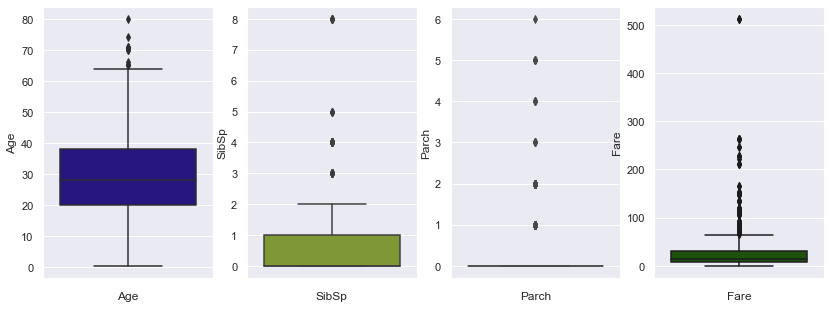

In [12]:
# CHECK OUTLIERS
# I WILL NOT REMOVE ANY OF THEN, BECAUSE I THINK THAT IT VARIABLES CAN BE USEFUL
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

plt.figure(figsize=(14,5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df_train, y=feature, color=np.random.randint([255,255,255])/255)
    plt.xlabel(feature)

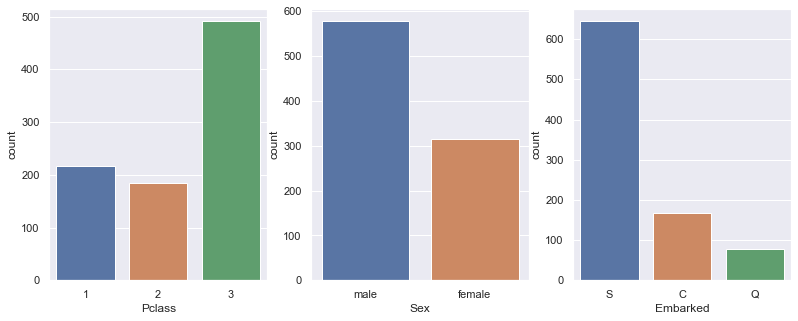

In [13]:
# HERE WE CAN SEE THE AMOUNT OF PEOPLE DIVIDED FOR CLASS, SEX, AND EMBARKED 
# THE CLASS 3, THE MALE GENRE, AND WHO EMBARKED ON S HAVE THE GREATEST AMOUNT OF PEOPLE
plt.figure(figsize=(18,5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=df_train, x=feature)
    plt.xlabel(feature)

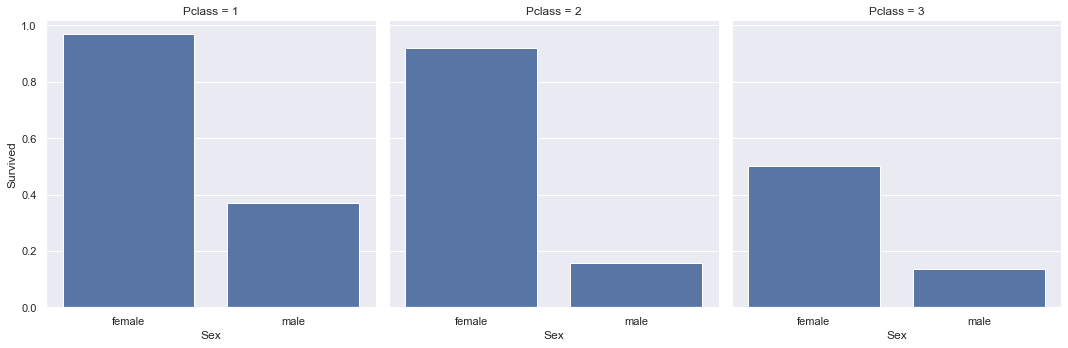

In [14]:
# CHECK SURVIVED BY SEX AND DIVIDED BY CLASS
# IN ALL CLASS FEMALE HAVE THE GREATES PROPORTION OF SURVIVED
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.barplot, "Sex", "Survived", ci=False, order=['female', 'male'])
plt.show()

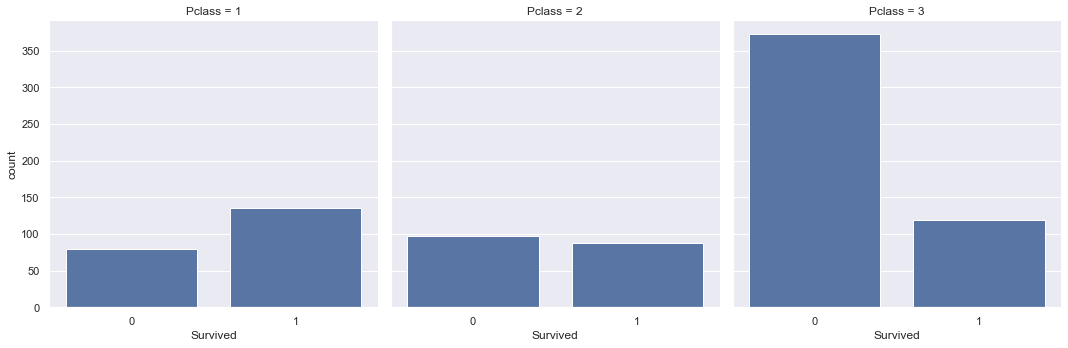

In [15]:
# COUNT THE AMOUNT OF DEATH/SURVIVED DIVIDED BY CLASS
# THE CLASS 3 HAVE THE LARGEST AMOUNT OF DEATH, THE LESS AMOUNT IS IN CLASS 1, ALONG WITH THE LARGET AMOUNT OF SURVIVED
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.countplot, "Survived", order=[0, 1])
plt.show()

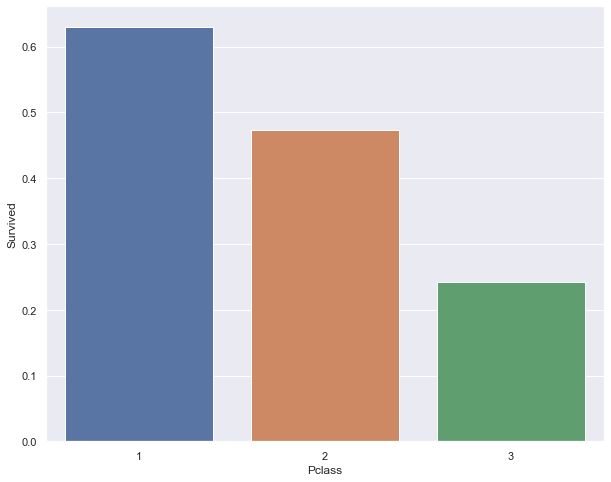

In [16]:
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_train, x="Pclass", y="Survived", ci=False)
plt.show()

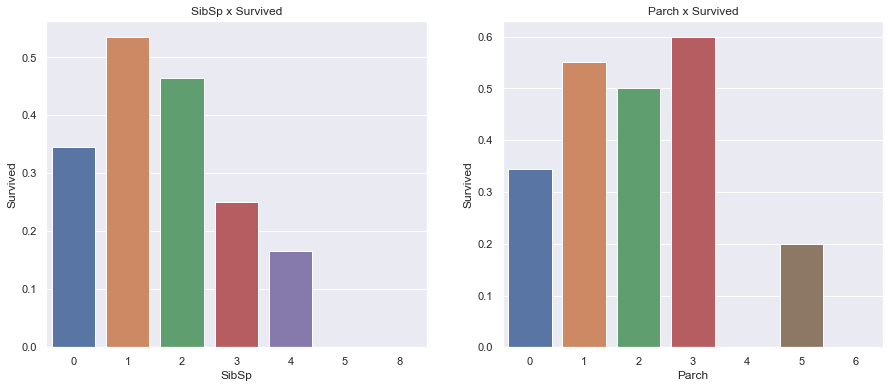

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False)
plt.title("SibSp x Survived")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False)
plt.title("Parch x Survived")

plt.show()

Text(0.5, 1.0, 'SibSp x Survived x Sex')

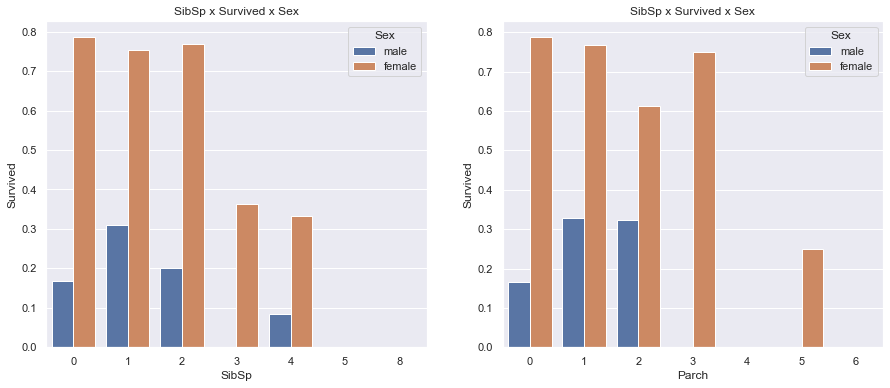

In [18]:
# SibSp x Survived x Sex
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived x Sex")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived x Sex")

## Age

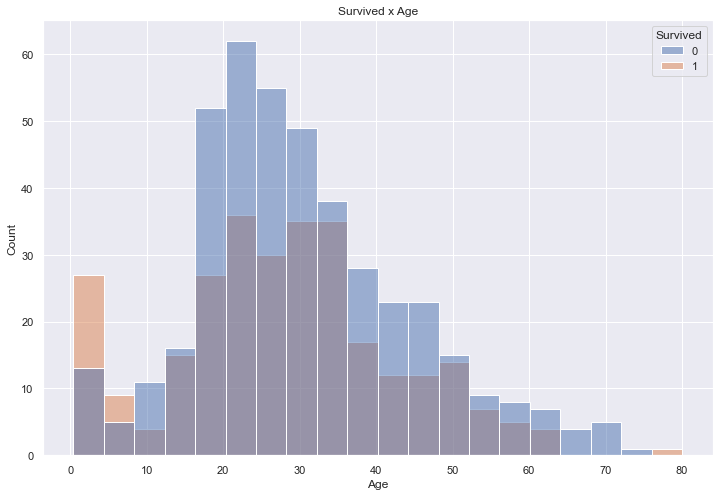

In [19]:
# SURVIVED x AGE
# WE CAN SEE THAT THE BIG AMOUNT OF DEATH AND SURVIVE OCCOUR IN THE RANGE OF ABOUT 16 UNTIL ABOUT 36
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x="Age", hue="Survived")
plt.title("Survived x Age")
plt.show()

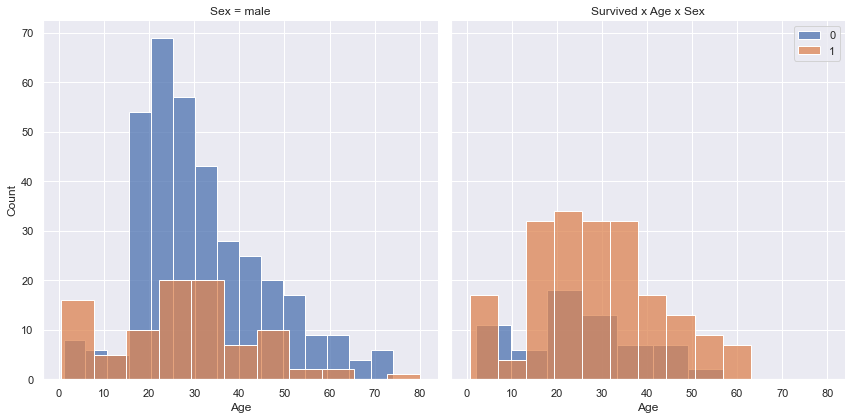

In [20]:
# DIVIDE BY SEX WE CAN SEE THAT THE DEATH MAJORITY IS MALE AND MAJORITY SURVIVED IS FEMALE
grid = sns.FacetGrid(data=df_train, col="Sex", hue="Survived", height=6)
grid.map(sns.histplot, "Age")
plt.title("Survived x Age x Sex")
plt.legend()
plt.show()

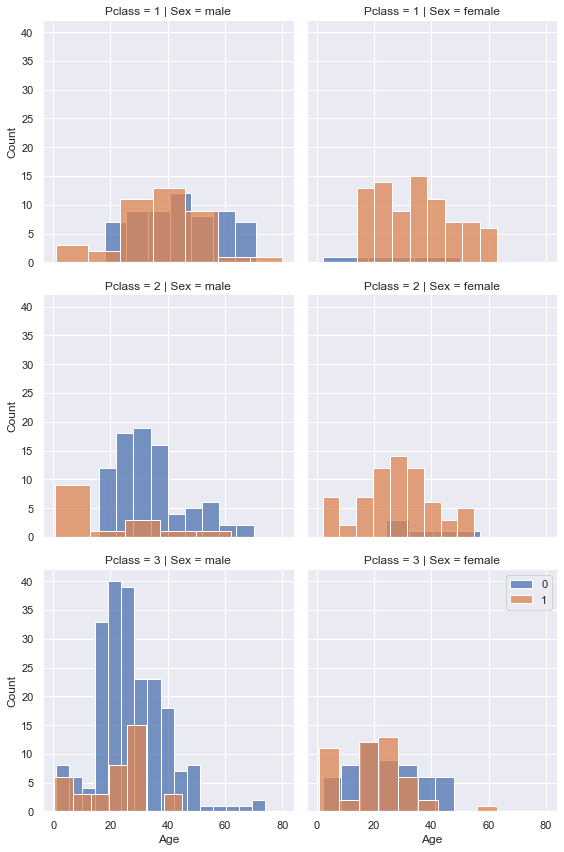

In [21]:
# SEEING BY CLASS WOMEN IN THE CLASS 1 AND 2 HAVE A BIG AMOUNT OF SURVIVE, THE MAJORITY DEATH OCCOUR IN THE CLASS 3.
# FOR THE MEN THE CLASS 1 HAVE THE AMOUNT OF SURVIVE, CLASS 2 THE DEATH INCREASES AND IN CLASS 3 THE MAJORITY DEATH OCCOUR
grid = sns.FacetGrid(data=df_train, col="Sex", row="Pclass", hue="Survived", height=4)
grid.map(sns.histplot, "Age")
plt.legend()
plt.show()

## Fare

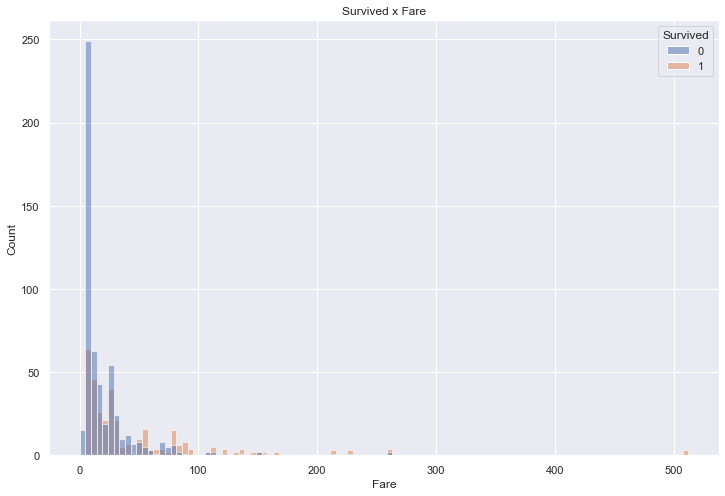

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x="Fare", hue="Survived")
plt.title("Survived x Fare")
plt.show()

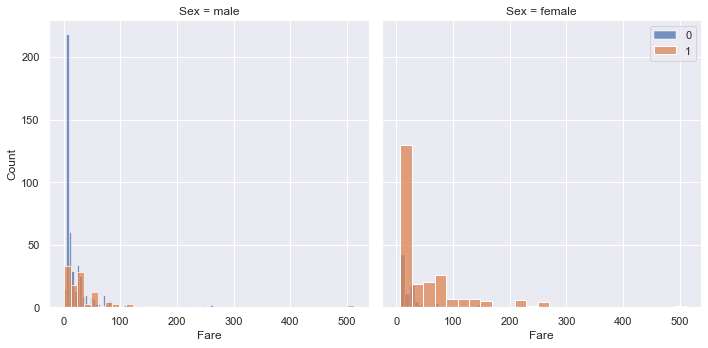

In [23]:
grid = sns.FacetGrid(data=df_train, col="Sex", hue="Survived", height=5)
grid.map(sns.histplot, "Fare")
plt.legend()
plt.show()

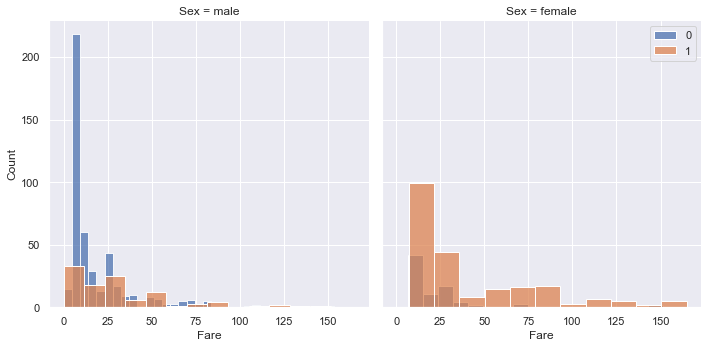

In [24]:
# EXISTS SOME VALUES THAT ARE MUCH HIGH, I WILL PLOT WITHOUT THIS VALUES TO SEE THE DISTRIBUTION
# PEOPLE THAT PAY LESS THAN 30 HAVE A GREATEST AMOUNT OF DEATH, AND LESS THAN 10 HAVE THE GREATEST MAJORITY OF DEATH
grid = sns.FacetGrid(data=df_train.loc[df_train["Fare"] < 200], col="Sex", hue="Survived", height=5)
grid.map(sns.histplot, "Fare")
plt.legend()
plt.show()

## Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

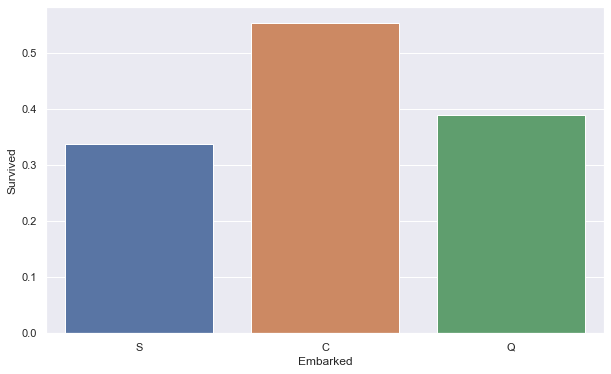

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_train, x="Embarked", y="Survived", ci=False)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

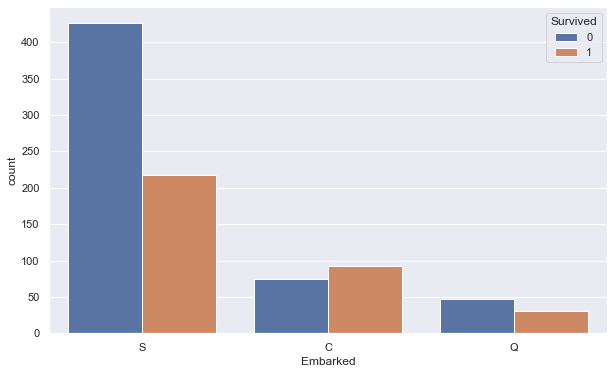

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x="Embarked", hue="Survived")

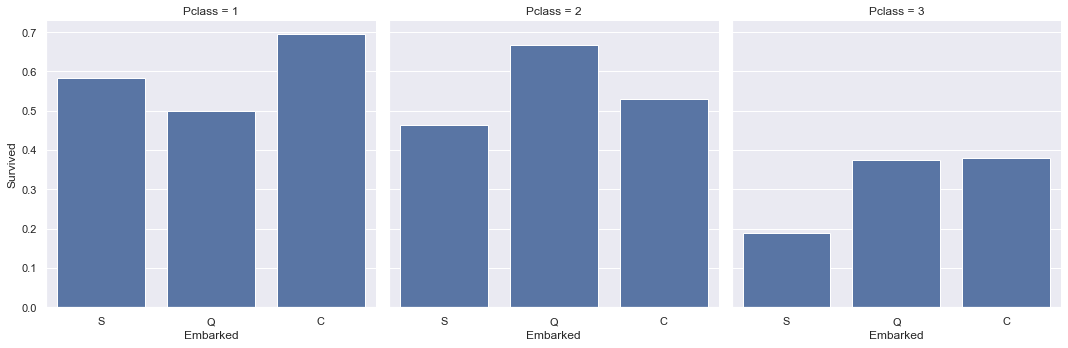

In [27]:
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.barplot, "Embarked", "Survived", ci=False, order=["S", "Q", "C"])

## Data Clean and Transform

In [28]:
# FIRST I WILL REMOTE ALL FEATURES THAT I THINK NOT WILL BE USEFULL
# I WILL REMOVE THE PassengerId, Name, Ticket, and Cabin
remove_features_train = ["PassengerId", "Name", "Ticket", "Cabin"]
remove_features_test = ["Name", "Ticket", "Cabin"]
df_train = df_train.drop(remove_features_train, axis=1)
df_test = df_test.drop(remove_features_test, axis=1)

### Missing Values - Age

In [29]:
print(f"\033[1m Missing Age Values\033[0m")
print(f"Total: {df_train['Age'].isnull().sum()}")

 Missing Age Values
Total: 177


In [30]:
# THE AGE FEATURES HAVE SOME MISSING VALUES
# I ADD TO THIS LINES THE MEAN OF AGE BASED ON THE SEX

# USE ALL AGES (THE TRAIN AND TEST) TO CALCULATE THE MEAN
df_temp = pd.concat([df_train, df_test])

# GET MEAN
age_female_mean = df_temp.groupby("Sex")["Age"].mean()["female"]
age_male_mean = df_temp.groupby("Sex")["Age"].mean()["male"]

missing_female_before = df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull())].shape[0]
missing_male_before = df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull())].shape[0]

In [31]:
# TRAIN DATASET
df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull()), "Age"] = age_male_mean
df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull()), "Age"] = age_female_mean

# TEST DATASET
df_test.loc[(df_test["Sex"] == "male") & (df_test["Age"].isnull()), "Age"] = age_male_mean
df_test.loc[(df_test["Sex"] == "female") & (df_test["Age"].isnull()), "Age"] = age_female_mean

missing_female_after = df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull())].shape[0]
missing_male_after = df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull())].shape[0]

print("\033[1mMissing Age Values\033[0m")
print(f"Before: female - {missing_female_before}, male: {missing_male_before}.")
print(f"After:  female - {missing_female_after}, male: {missing_male_after}.")

Missing Age Values
Before: female - 53, male: 124.
After:  female - 0, male: 0.


### Missing Values - Cabin

In [32]:
# THE CABIN FEATURE HAVE A SMALL AMOUNT OF MISSING VALUES, BECAUSE OF THIS I WILL REMOVE THESE LINES
print(f"\33[1mMissing Embarked Values\33[0m")
print(f"Total: {df_temp['Embarked'].isnull().sum()}")

Missing Embarked Values
Total: 2


In [33]:
# REMOVE MISSING Embarked ROWS
df_train = df_train.loc[~df_train["Embarked"].isnull()]
df_test = df_test.loc[~df_test["Embarked"].isnull()]

In [34]:
# RESET THE INDEX
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Change Sex Values

### Sex

In [36]:
# MAP female TO 1 AND male TO 0
sex_map = {"male" : 0, "female" : 1}
df_train["Sex"] = df_train["Sex"].map(sex_map)
df_test["Sex"] = df_test["Sex"].map(sex_map)

## Embarked

In [37]:
embarked_map = {"S": 0, "C": 1, "Q": 2}
df_train["Embarked"] = df_train["Embarked"].map(embarked_map)
df_test["Embarked"] = df_test["Embarked"].map(embarked_map)

### Age

In [38]:
# NOW I WILL TO TRANSFORM THE AGE AND FIRE, I WILL CREATE RANGES OF AGES AND FIRE USING qcut
pd.qcut(df_temp["Age"], 5).value_counts()

(0.169, 19.0]    225
(19.0, 25.0]     218
(31.0, 42.0]     217
(42.0, 80.0]     195
(25.0, 31.0]     191
Name: Age, dtype: int64

In [39]:
# [0.419, 19.0] = 0 
# [19.0, 25.0] = 1
# [25.0, 31.0] = 2
# [31.0, 42.0] = 3
# [42.0, 80.0] = 4

df_train.loc[(df_train["Age"] >= 0) & (df_train["Age"] < 19), "Age"] = 0 
df_train.loc[(df_train["Age"] >= 19) & (df_train["Age"] < 25), "Age"] = 1
df_train.loc[(df_train["Age"] >= 25) & (df_train["Age"] < 32), "Age"] = 2
df_train.loc[(df_train["Age"] >= 32) & (df_train["Age"] < 42), "Age"] = 3
df_train.loc[(df_train["Age"] >= 42), "Age"] = 4

df_test.loc[(df_test["Age"] >= 0) & (df_test["Age"] < 19), "Age"] = 0 
df_test.loc[(df_test["Age"] >= 19) & (df_test["Age"] < 25), "Age"] = 1
df_test.loc[(df_test["Age"] >= 25) & (df_test["Age"] < 32), "Age"] = 2
df_test.loc[(df_test["Age"] >= 32) & (df_test["Age"] < 42), "Age"] = 3
df_test.loc[(df_test["Age"] >= 42), "Age"] = 4

## Fare

In [40]:
pd.qcut(df_temp["Fare"], 5).value_counts()

(-0.001, 7.854]      275
(21.679, 41.579]     262
(41.579, 512.329]    259
(10.5, 21.679]       258
(7.854, 10.5]        254
Name: Fare, dtype: int64

In [41]:
# -0.001, 8]
# 8, 11]
# 11, 22]
# 22, 42]
# 41.579, 512.329]

df_train.loc[(df_train["Fare"] >= 0) & (df_train["Fare"] < 8), "Fare"] = 0 
df_train.loc[(df_train["Fare"] >= 8) & (df_train["Fare"] < 11), "Fare"] = 1
df_train.loc[(df_train["Fare"] >= 11) & (df_train["Fare"] < 22), "Fare"] = 2
df_train.loc[(df_train["Fare"] >= 22) & (df_train["Fare"] < 42), "Fare"] = 3
df_train.loc[(df_train["Fare"] >= 42), "Fare"] = 4

df_test.loc[(df_test["Fare"] >= 0) & (df_test["Fare"] < 8), "Fare"] = 0 
df_test.loc[(df_test["Fare"] >= 8) & (df_test["Fare"] < 11), "Fare"] = 1
df_test.loc[(df_test["Fare"] >= 11) & (df_test["Fare"] < 22), "Fare"] = 2
df_test.loc[(df_test["Fare"] >= 22) & (df_test["Fare"] < 42), "Fare"] = 3
df_test.loc[(df_test["Fare"] >= 42), "Fare"] = 4

In [42]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,3.0,1,0,4.0,1
2,1,3,1,2.0,0,0,0.0,0
3,1,1,1,3.0,1,0,4.0,0
4,0,3,0,3.0,0,0,1.0,0


In [43]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,3.0,0,0,0.0,2
1,893,3,1,4.0,1,0,0.0,0
2,894,2,0,4.0,0,0,1.0,2
3,895,3,0,2.0,0,0,1.0,0
4,896,3,1,1.0,1,1,2.0,0


In [44]:
# CHANGE THE Survived FEATURE TO A NEW VAR, THAT IS WHAT WE USE TO COMPARE ON THE TRAINING STEP
y_train = df_train["Survived"]
df_train = df_train.drop("Survived", axis=1)

## Train

In [45]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.metrics import accuracy_score

In [46]:
models = {"LogisticRegressionCV": LogisticRegressionCV(), "DecisionTreeClassifier": DecisionTreeClassifier(), 
         "ExtraTreeClassifier": ExtraTreeClassifier(), "RandomForestClassifier": RandomForestClassifier(), 
         "KNeighborsClassifier": KNeighborsClassifier(), "GaussianNB": GaussianNB(), "SMV": SVC(),
         "CatBoostClassifier": CatBoostClassifier(verbose=False), "XGBClassifier" : XGBClassifier(use_label_encoder=False, eval_metric='rmse'), 
         "HistGradientBoostingClassifier": HistGradientBoostingClassifier(verbose=False)
         }

def calculateBestModel(x_train, y_train, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    return accuracy_score(y_train, y_pred)

In [47]:
print("\033[1mCheck Best Model\n\033[0m")
print(f"{'Model Name':<34}{'Accuracy':>6}")

result_acc = {}
for model_name, model in models.items():
    acc = calculateBestModel(df_train, y_train, model)
    result_acc[model_name] = acc
    print(f"{model_name :.<33} {acc:>5}")

Check Best Model

Model Name                        Accuracy
LogisticRegressionCV............. 0.7930258717660292
DecisionTreeClassifier........... 0.890888638920135
ExtraTreeClassifier.............. 0.890888638920135
RandomForestClassifier........... 0.890888638920135
KNeighborsClassifier............. 0.8515185601799775
GaussianNB....................... 0.7694038245219348
SMV.............................. 0.8211473565804275
CatBoostClassifier............... 0.875140607424072
XGBClassifier.................... 0.8841394825646794
HistGradientBoostingClassifier... 0.876265466816648


In [48]:
df_acc = pd.DataFrame.from_dict(result_acc, orient = 'index', columns=["Acc"])

In [49]:
print(f"Max -> {df_acc.idxmax()[0]} = {df_acc.max()[0]}")

Max -> DecisionTreeClassifier = 0.890888638920135


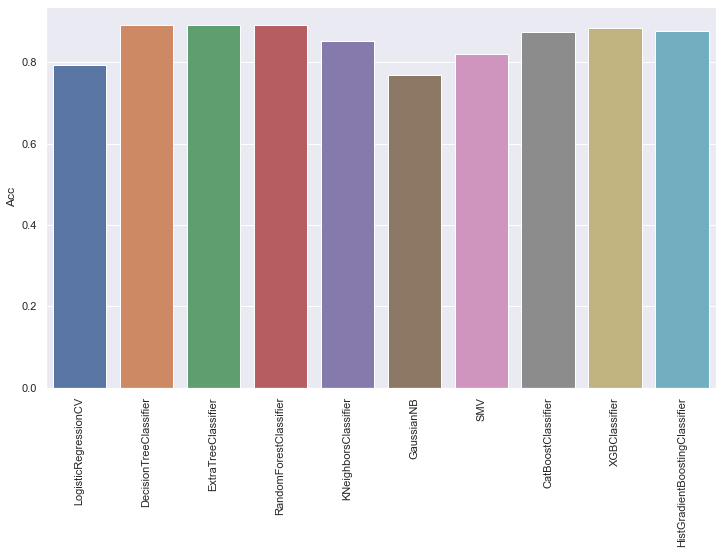

In [50]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_acc, x=df_acc.index, y="Acc")
plt.xticks(rotation=90)
plt.show()

In [66]:
model = models["XGBClassifier"]
model.fit(df_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [67]:
df_test.loc[df_test["Fare"].isnull(), "Fare"] = 0 

In [68]:
x_test = df_test.iloc[:, df_test.columns != "PassengerId"]

In [69]:
y_pred = model.predict(x_test)

In [70]:
result = pd.concat([df_test["PassengerId"], pd.DataFrame(y_pred)], axis = 1)

In [71]:
result.columns = ["PassengerId", "Survived"]

In [72]:
# Score: 0.73...
result.to_csv("../output/my_submission_31_03_DecisionTreeClassifier.csv", index=False)

# Score: 0.75119
result.to_csv("../output/my_submission_31_03_XGBoost.csv", index=False)

In [73]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1.0,1,0,0.0,0
1,1,1,3.0,1,0,4.0,1
2,3,1,2.0,0,0,0.0,0
3,1,1,3.0,1,0,4.0,0
4,3,0,3.0,0,0,1.0,0
...,...,...,...,...,...,...,...
884,2,0,2.0,0,0,2.0,0
885,1,1,1.0,0,0,3.0,0
886,3,1,2.0,1,2,3.0,0
887,1,0,2.0,0,0,3.0,1
